In [1]:
import pandas as pd
import os

from skimage.transform import resize
from skimage.io import imread

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import rotate

In [30]:
ages = ['30_day_crops','45_day_crops','60_day_crops', '180_day_crops', '330_day_crops', '720_day_crops']
flat_data_arr = []
target_arr = []

for i in ages:
    print(f'age : {i} days')
    path=os.path.join(r'Good RPE Crops',i)
    
    for img in os.listdir(path):
        flip_arr = []
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        
        flat_data_arr.append(img_resized.flatten())
        flip_arr.append(img_resized)
        target_arr.append(ages.index(i))

        if i in ['30_day_crops', '45_day_crops', '60_day_crops', '720_day_crops']:
            for j in [90, 180, 270]:
                r = rotate(img_resized, j)
                flat_data_arr.append(r.flatten())
                flip_arr.append(r)
                target_arr.append(ages.index(i))

        if i in ['30_day_crops', '330_day_crops', '720_day_crops']:
            for j in flip_arr:
                f = np.flip(j, axis=0)
                flat_data_arr.append(f.flatten())
                target_arr.append(ages.index(i))

        
    print('finished')
    
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=flat_data 
y=target

age : 30_day_crops days
finished
age : 45_day_crops days
finished
age : 60_day_crops days
finished
age : 180_day_crops days
finished
age : 330_day_crops days
finished
age : 720_day_crops days
finished


<BarContainer object of 6 artists>

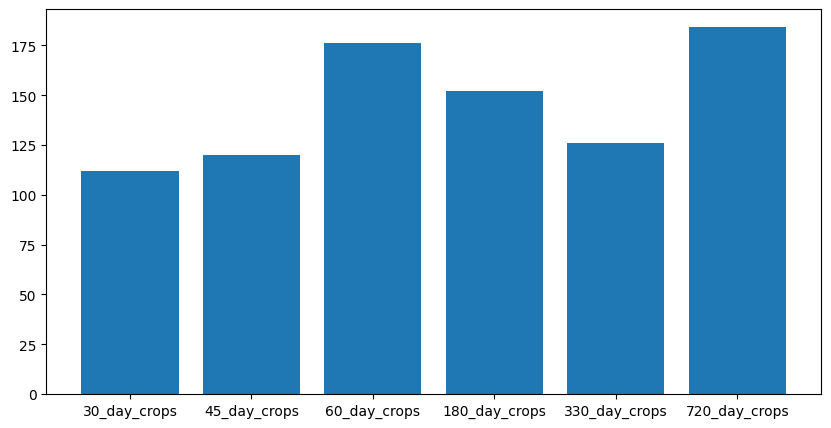

In [33]:
# displaying distribution of samples post-augmenting
test = list(y)
height = [test.count(i) for i in range(6)]

plt.figure(figsize=(10,5))
plt.bar(ages, height)

In [34]:
from sklearn import svm
model=svm.SVC(C=10, gamma=0.001)

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, stratify=y)
print('Split Successful')

model.fit(x_train,y_train)
print('Training Successful')

Split Successful
Training Successful


In [36]:
from sklearn.metrics import accuracy_score, classification_report

y_pred=model.predict(x_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100:.4f}% accurate")
print(classification_report(y_test, y_pred, target_names=ages, zero_division=0))

The model is 76.4368% accurate
               precision    recall  f1-score   support

 30_day_crops       0.89      0.74      0.81        23
 45_day_crops       1.00      0.83      0.91        24
 60_day_crops       0.67      0.74      0.70        35
180_day_crops       0.74      0.77      0.75        30
330_day_crops       0.73      0.76      0.75        25
720_day_crops       0.72      0.76      0.74        37

     accuracy                           0.76       174
    macro avg       0.79      0.77      0.78       174
 weighted avg       0.78      0.76      0.77       174



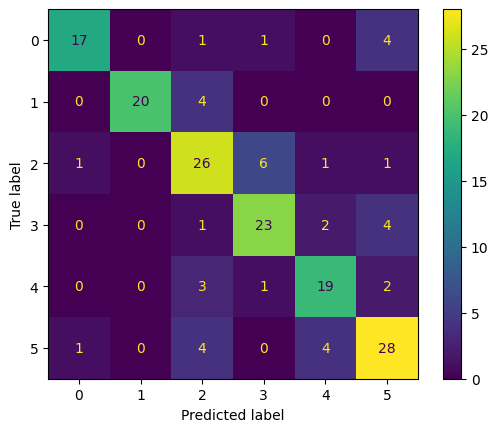

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [177]:
# saving particular case of a model
import joblib

joblib.dump(model, 'RPE_svm_model.pkl')

['RPE_svm_model.pkl']

In [200]:
# testing joblib loading

rpe_svm = joblib.load('RPE_svm_model.pkl')